# Section 1 of portfolio

## 0) Loading and preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.font_manager as fm

In [2]:
df = pd.read_csv('data/rym_clean1.csv', index_col = 'position')
df.drop('Unnamed: 0', axis=1, inplace = True)

df['release_date'] = pd.to_datetime(df.release_date)
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

df['p_g'] = df.primary_genres.fillna('')
df['s_g'] = df.secondary_genres.fillna('')


df['genres'] = df.p_g + ', ' + df.s_g
df['genres'] = df['genres'].str.replace(', ',',')
df['genres_list'] = df.genres.str.strip(', ').str.split(',')

df['p_g'] = df.p_g.str.replace(', ',',')
df['p_g'] = df.p_g.str.strip(', ').str.split(',')

df['s_g'] = df.s_g.str.replace(', ',',')
df['s_g'] = df.s_g.str.strip(', ').str.split(',')

df['descs'] = df['descriptors'].str.replace(', ',',')
df['descs'] = df['descs'].str.replace(',...','')
df['desc_list'] = df.descs.str.strip(', ').str.split(',')

df.drop(['release_type', 'primary_genres','secondary_genres','descriptors','genres','descs'], axis=1, inplace=True)

In [3]:
df.head()

,release_name,artist_name,release_date,avg_rating,rating_count,review_count,year,month,p_g,s_g,genres_list,desc_list
position,,,,,,,,,,,,
1,OK Computer,Radiohead,1997-06-16,4.24,74027,1541,1997,6,"[Alternative Rock, Art Rock]",[],"[Alternative Rock, Art Rock]","[melancholic, anxious, futuristic, malevocals,..."
2,Kid A,Radiohead,2000-10-03,4.23,61658,751,2000,10,"[Art Rock, Experimental Rock, Electronic]","[Ambient, Electronic, IDM]","[Art Rock, Experimental Rock, Electronic, Ambi...","[cold, melancholic, futuristic, anxious, atmos..."
3,The Dark Side of the Moon,Pink Floyd,1973-03-23,4.21,60192,1557,1973,3,"[Art Rock, Progressive Rock]","[Psychedelic Rock, Space Rock]","[Art Rock, Progressive Rock, Psychedelic Rock,...","[philosophical, atmospheric, introspective, ex..."
4,Loveless,My Bloody Valentine,1991-11-11,4.24,53174,1264,1991,11,"[Shoegaze, Noise Pop]","[Dream Pop, Neo-Psychedelia]","[Shoegaze, Noise Pop, Dream Pop, Neo-Psychedelia]","[noisy, ethereal, atmospheric, romantic, love,..."
5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,4.09,52149,638,2010,11,"[Pop Rap, Hip Hop]",[Art Pop],"[Pop Rap, Hip Hop, Art Pop]","[epic, boastful, passionate, sampling, hedonis..."


## 1) Searching for Favorites

### i) Albums

* Most Ratings
* Highest average rating
* Most Reviews

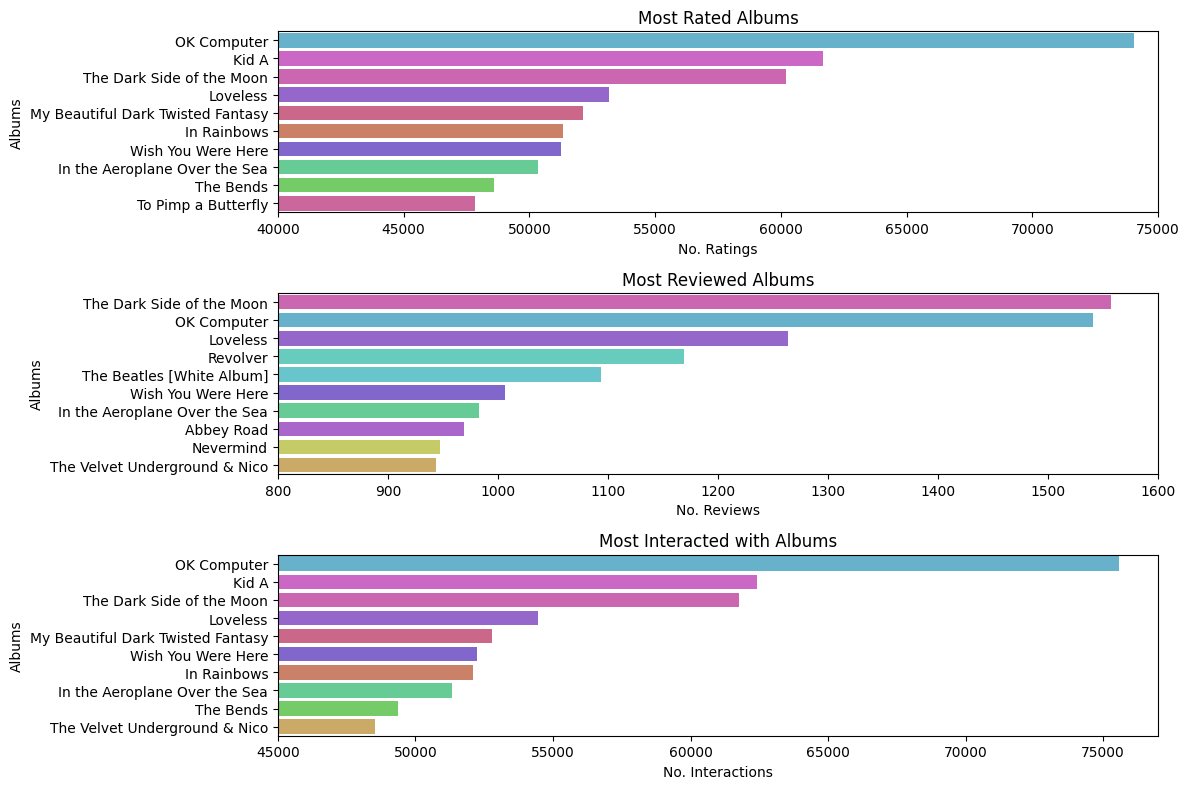

In [4]:
graphed_albums = df.head(10)['release_name'].values.tolist() + df.sort_values('avg_rating',ascending=False).head(10)['release_name'].values.tolist() +\
df.sort_values('review_count',ascending=False).head(10)['release_name'].values.tolist()

random.seed(7)
nalbums = len(graphed_albums)
palette = sns.color_palette('hls', nalbums)
random.shuffle(graphed_albums)
album_color_dict = dict(zip(graphed_albums, palette))

fig, axe = plt.subplots(3,1, figsize=(12,8))

sns.barplot(ax = axe[0],data=df.head(10), y='release_name',x='rating_count', hue='release_name',palette=album_color_dict)
plt.sca(axe[0])
plt.xlim(40000,75000)
plt.title('Most Rated Albums')
plt.xlabel('No. Ratings')
plt.ylabel('Albums')
# plt.xticks(rotation=90);

# sns.barplot(ax=axe[1], data=df.sort_values('avg_rating',ascending=False).head(10), x='release_name',y='avg_rating',  hue='release_name',palette=album_color_dict)
# plt.sca(axe[1])
# plt.ylim(4.2,4.35)
# plt.title('Highest Scoring Albums')
# plt.ylabel('Average Rating')
# plt.xlabel('Albums')
# plt.xticks(rotation=90);

sns.barplot(ax=axe[1], data=df.sort_values('review_count',ascending=False).head(10), y='release_name',x='review_count',  hue='release_name',palette=album_color_dict)
plt.sca(axe[1])
plt.xlim(800,1600)
plt.title('Most Reviewed Albums')
plt.xlabel('No. Reviews')
plt.ylabel('Albums')
# plt.xticks(rotation=90);

df['interactions'] = df['rating_count'] + df['review_count']
# df
# plt.figure(figsize=(12,9))
sns.barplot(ax=axe[2],data=df.sort_values('interactions',ascending=False).head(10), y='release_name',x='interactions',  hue='release_name',palette=album_color_dict)
plt.sca(axe[2])
plt.xlim(45000,77000)
plt.title('Most Interacted with Albums')
plt.xlabel('No. Interactions')
plt.ylabel('Albums')
# plt.xticks(rotation=90);
plt.tight_layout()

plt.tight_layout()
plt.savefig('plots/combined_barplot')

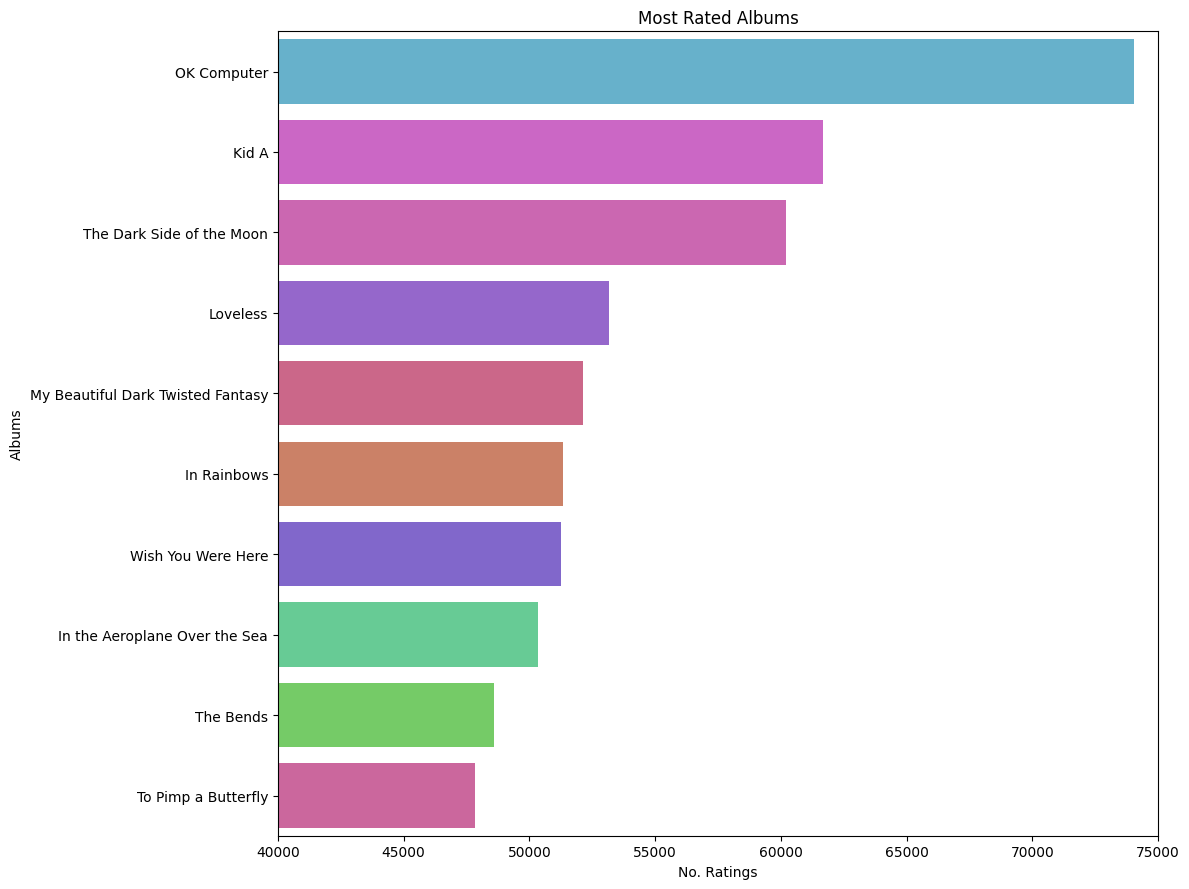

In [5]:
plt.figure(figsize=(12,9))
sns.barplot(data=df.head(10), y='release_name',x='rating_count', hue='release_name',palette=album_color_dict)
plt.xlim(40000,75000)
plt.title('Most Rated Albums')
plt.xlabel('No. Ratings')
plt.ylabel('Albums')
# plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('plots/most_rated_barplot')

In [6]:
album_color_dict['The Rise and Fall of Ziggy...'] =(0.33999999999999997,
  0.5167999999999999,
  0.86)
# album_color_dict

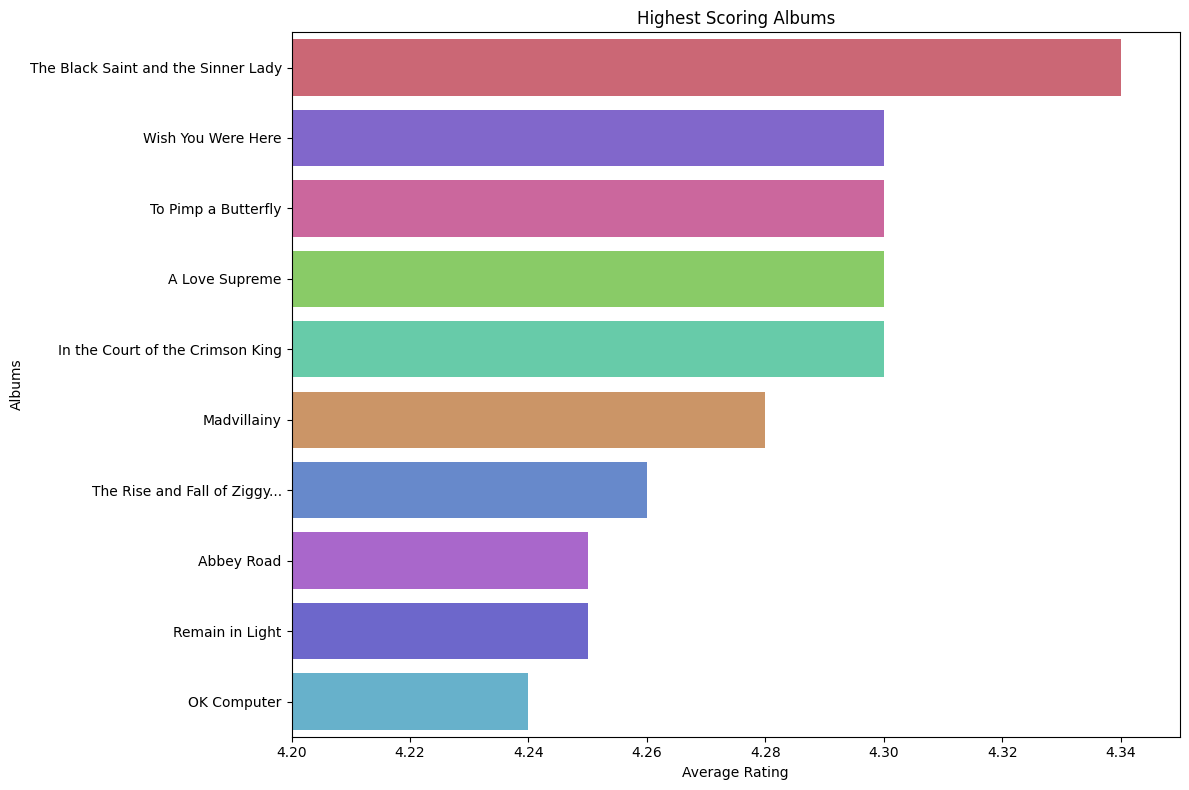

In [7]:
df_plot = df.sort_values('avg_rating',ascending=False).head(10).copy()


df_plot.loc[18,'release_name'] = 'The Rise and Fall of Ziggy...'


# df_plot.release_name == 'The Rise and Fall of Ziggy Stardust and the Spiders from Mars'

plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, y='release_name',x='avg_rating',  hue='release_name',palette=album_color_dict)
plt.xlim(4.2,4.35)
plt.title('Highest Scoring Albums')
plt.xlabel('Average Rating')
plt.ylabel('Albums')
# plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('plots/highest_score_bar')

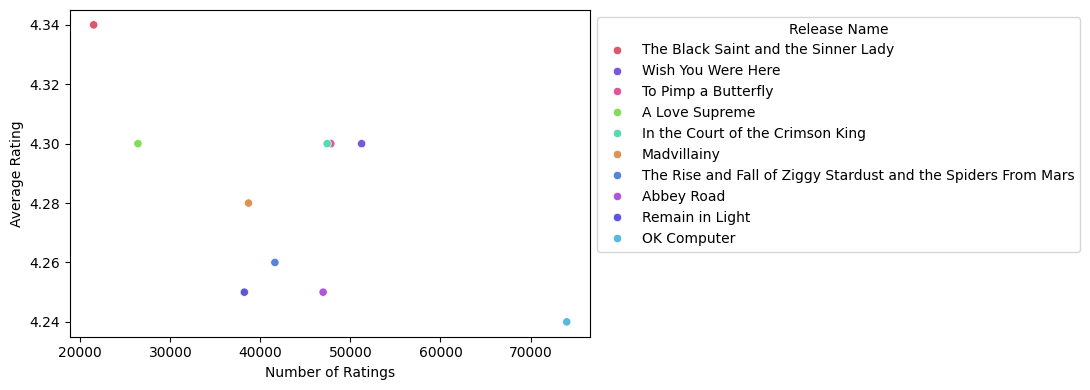

In [8]:
ratvcnt = df.sort_values('avg_rating',ascending=False).head(10)[['release_name','avg_rating','rating_count']].reset_index(drop=True)
plt.figure(figsize=(11,4))
ax = sns.scatterplot(data = ratvcnt,x='rating_count',y='avg_rating',hue='release_name', palette = album_color_dict)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), title='Release Name')
plt.ylabel('Average Rating')
plt.xlabel('Number of Ratings');
plt.tight_layout()
plt.savefig('plots/rates_vs_numrates')

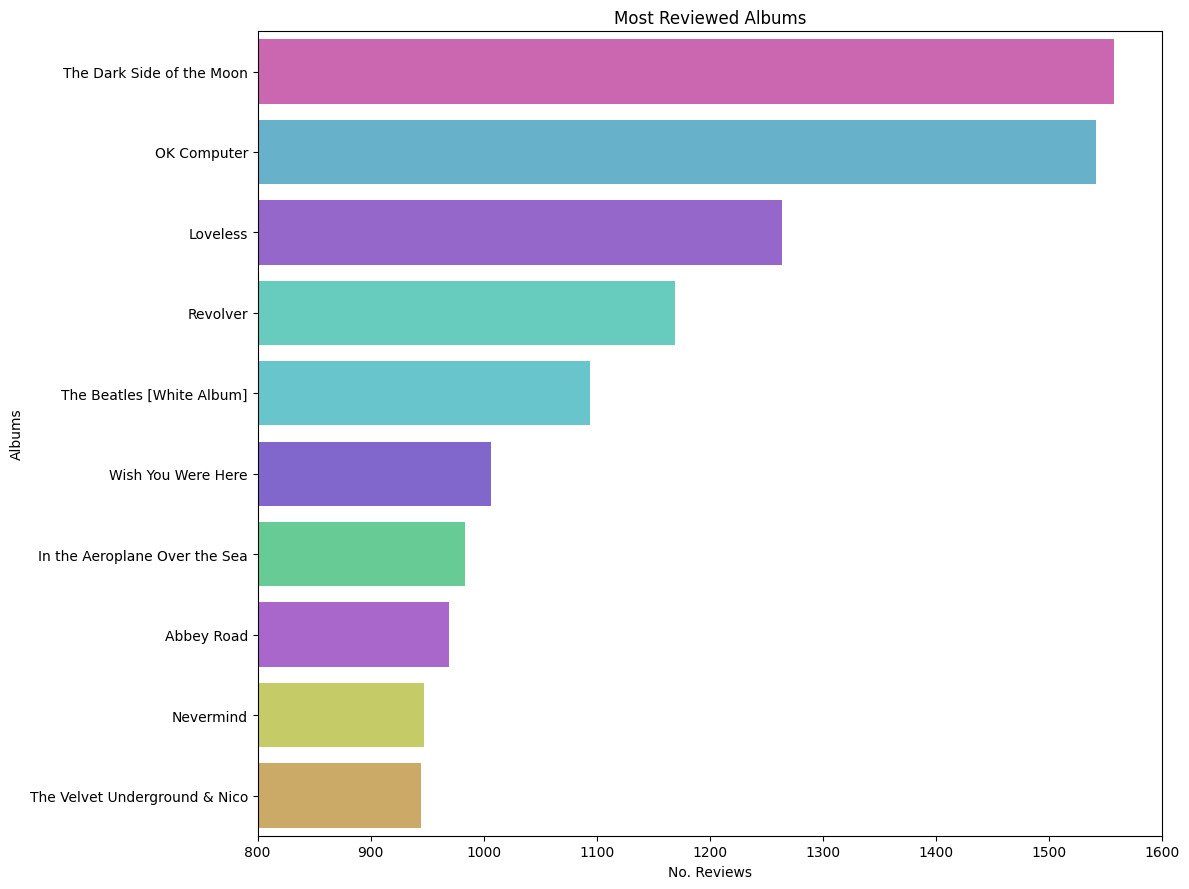

In [9]:
plt.figure(figsize=(12,9))
sns.barplot(data=df.sort_values('review_count',ascending=False).head(10), y='release_name',x='review_count',  hue='release_name',palette=album_color_dict)
plt.xlim(800,1600)
plt.title('Most Reviewed Albums')
plt.xlabel('No. Reviews')
plt.ylabel('Albums')
# plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('plots/most_reviewed_bar')

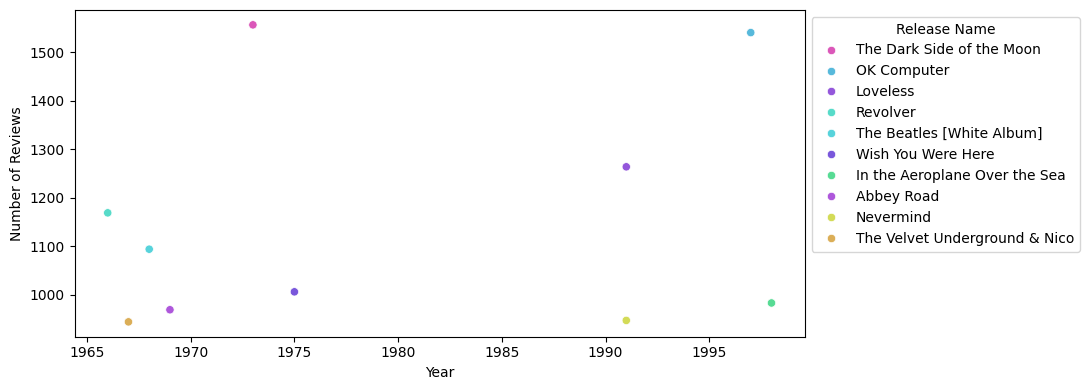

In [10]:
df_mrt = df.sort_values('review_count',ascending=False).head(10)
df_mrt['release_date'] = pd.to_datetime(df_mrt['release_date'])
df_mrt['year'] = df_mrt['release_date'].dt.year

# revvyr = df.sort_values('avg_rating',ascending=False).head(10)[['release_name','review_count','y']].reset_index(drop=True)
plt.figure(figsize=(11,4))
ax = sns.scatterplot(data = df_mrt,x='year',y='review_count',hue='release_name', palette = album_color_dict)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Release Name')
plt.ylabel('Number of Reviews')
plt.xlabel('Year');
plt.tight_layout()
plt.savefig('plots/year_vs_numreviews')

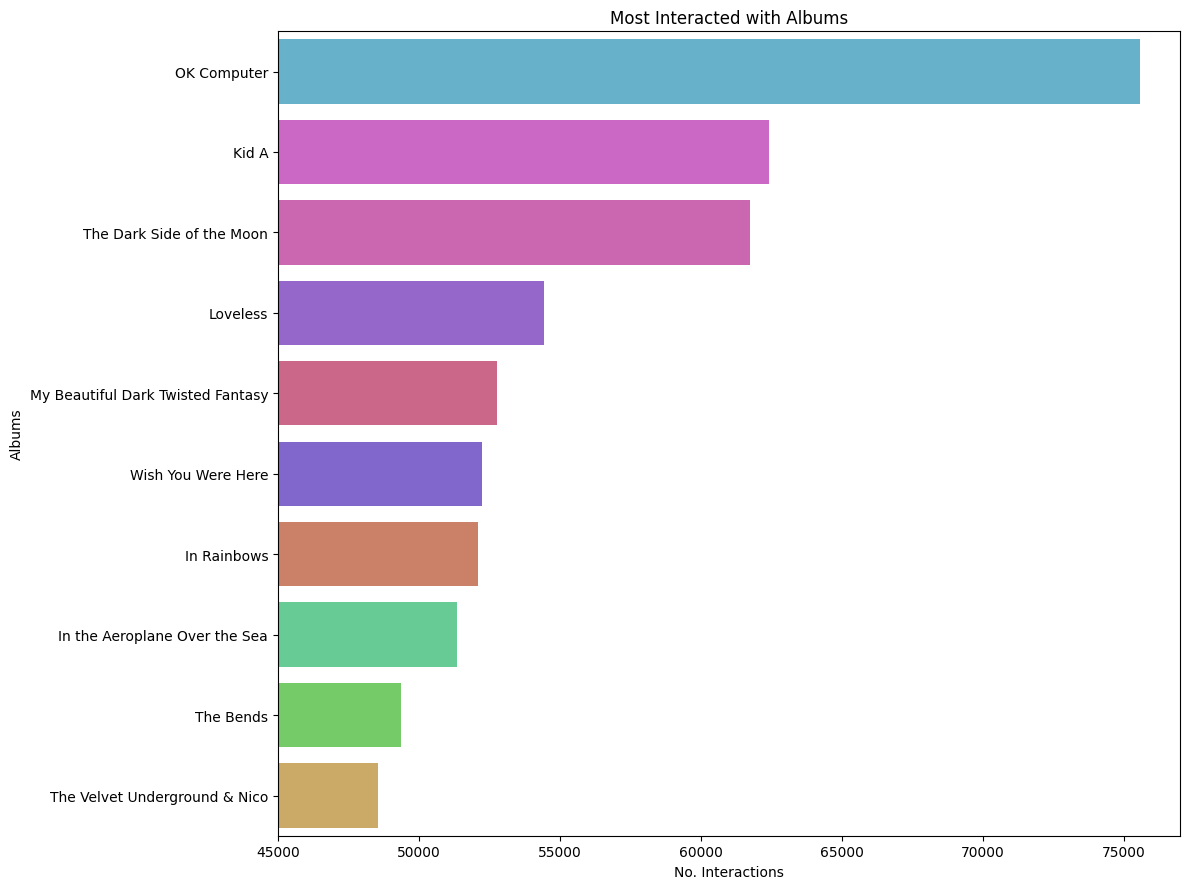

In [11]:
df['interactions'] = df['rating_count'] + df['review_count']
# df
plt.figure(figsize=(12,9))
sns.barplot(data=df.sort_values('interactions',ascending=False).head(10), y='release_name',x='interactions',  hue='release_name',palette=album_color_dict)
plt.xlim(45000,77000)
plt.title('Most Interacted with Albums')
plt.xlabel('No. Interactions')
plt.ylabel('Albums')
# plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('plots/most_interacted_with_bar')


##### winners:
* Most Ratings, Clear winner: OK computer
* Average Rating: The Black Saint and the Sinner Lady, with several albums close at 4.00. ratings are aggregated to the nearest second decimal, we miss out some of the variation.
* Most Reviews, Slight winner: The dark side of the Moon

##### Remarks:
* Overall Ok computer has the most interaction, with dsotm a close second
* Despite being the highest scoring mingus' album has low ratings/reviews and would likely be lower if it had more ratings

#### Goals:

Finding Favourites:

catagories:
* Album
* Artist
* Genre 
* Year

metrics for 'favourites':
* Most Popular: highest number of entries per category
* Most Consistent: Highest average rating of all entries in a category
* Most rated: highest number of ratings of all entreis per category
* Most reviewed: highest number of reviews of all entries per category

Finding Worsts:\
" 

Extension: ml model for predicting rating?\
(not sure it'd work, the features that avoid contamination are all catagorical and don't provide much information)

### ii) Artists
* Violin Plots of artist ratings and frequencies
* box plots!!

In [12]:
#Generating grouped data for analysis

artists_grouped_metrics = df.groupby('artist_name')[['avg_rating', 'rating_count','review_count','year']].aggregate({'avg_rating':['count','mean'],\
                                                                            'rating_count':'sum',\
                                                                            'review_count':'sum',\
                                                                            'year':['max','min','mean']}).sort_values(by=('avg_rating','mean'),ascending=False)

#writing to smaller frames for individual plots
#mp - most popular, hr - highest rating, mra = most rated

ten_mp = artists_grouped_metrics.sort_values(by=('avg_rating','count'),ascending=False)[:10]
df_mp = df[df['artist_name'].isin(ten_mp.index.tolist())]

ten_hr = artists_grouped_metrics.sort_values(by=('avg_rating','mean'),ascending=False)[:10]
df_hr = df[df['artist_name'].isin(ten_hr.index.tolist())]

ten_mra = artists_grouped_metrics.sort_values(by=('rating_count','sum'),ascending=False)[:10]
df_mra = df[df['artist_name'].isin(ten_mra.index.tolist())]

ten_mre = artists_grouped_metrics.sort_values(by=('review_count','sum'),ascending=False)[:10]
df_mre = df[df['artist_name'].isin(ten_mre.index.tolist())]

all_hr = artists_grouped_metrics.sort_values(by=('avg_rating','count'),ascending=False)
all_hr = all_hr[all_hr[('avg_rating','count')]>2].sort_values(('avg_rating','mean'), ascending=False)[:20]
df_hra = df[df['artist_name'].isin(all_hr.index.tolist())]

In [13]:
#Grouped frames lose sorting; sort values according to important metric

sorting = [chr(i) for i in range(ord('a'),ord('k'))]
my_key_mp = dict(zip(ten_mp.index,sorting))
df_mp = df_mp.sort_values(by='artist_name', key = lambda col:col.map(my_key_mp))

my_key_hr = dict(zip(ten_hr.index,sorting))
df_hr = df_hr.sort_values(by='artist_name', key = lambda col:col.map(my_key_hr))

my_key_mra = dict(zip(ten_mra.index,sorting))
df_mra = df_mra.sort_values(by='artist_name', key = lambda col:col.map(my_key_mra))

my_key_mre = dict(zip(ten_mre.index,sorting))
df_hr = df_hr.sort_values(by='artist_name', key = lambda col:col.map(my_key_mre))

my_key_hra = dict(zip(all_hr.index,sorting))
df_hra = df_hra.sort_values(by='artist_name', key = lambda col:col.map(my_key_hra))



In [14]:
#Generate a palette of unique colours for each artist, that will hold consistent across the plots

artists = list(set(df_mp.artist_name.to_list() + df_hr.artist_name.to_list() + df_mra.artist_name.to_list()+\
df_mre.artist_name.to_list() + df_hra.artist_name.to_list()))
palette = sns.color_palette('hls',len(artists))
random.seed(3)
random.shuffle(artists)
artist_palette = dict(zip(artists,palette))

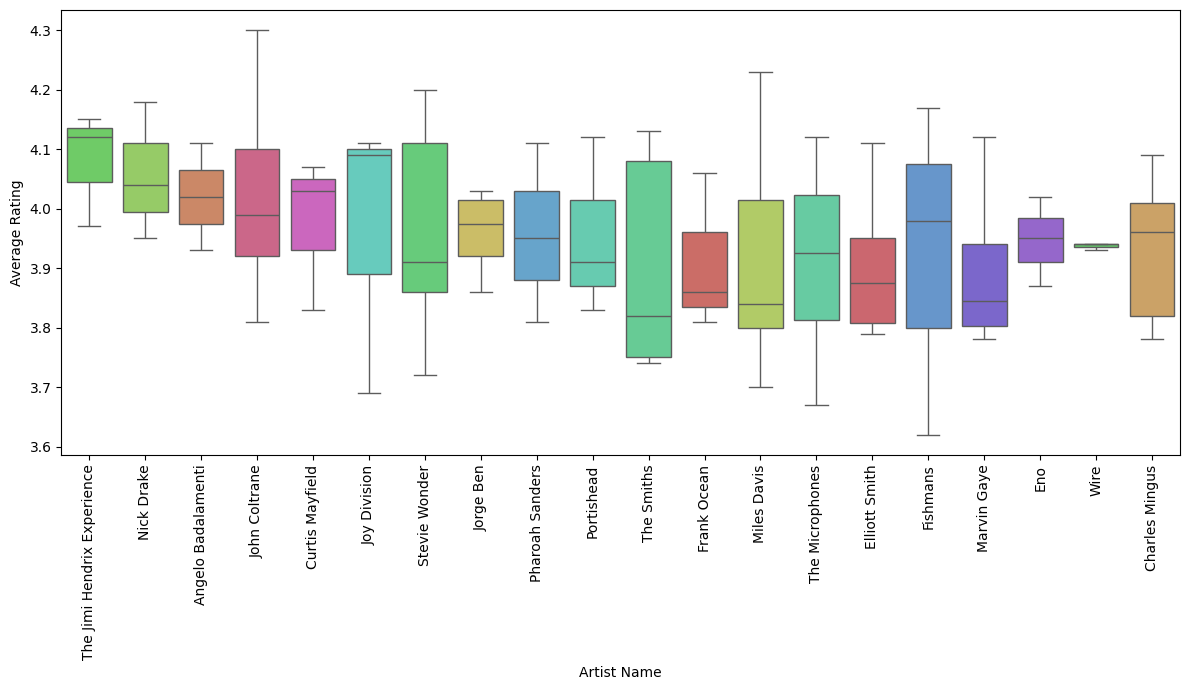

In [15]:
#plotting 
plt.figure(figsize=(12,7))
ax = sns.boxplot(data = df_hra, x = 'artist_name', y = 'avg_rating', hue='artist_name',palette=artist_palette)
# plt.setp(ax.get_xticklabels(), fontproperties=font_prop)
plt.xticks(rotation=90);
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/highest_avg_box')

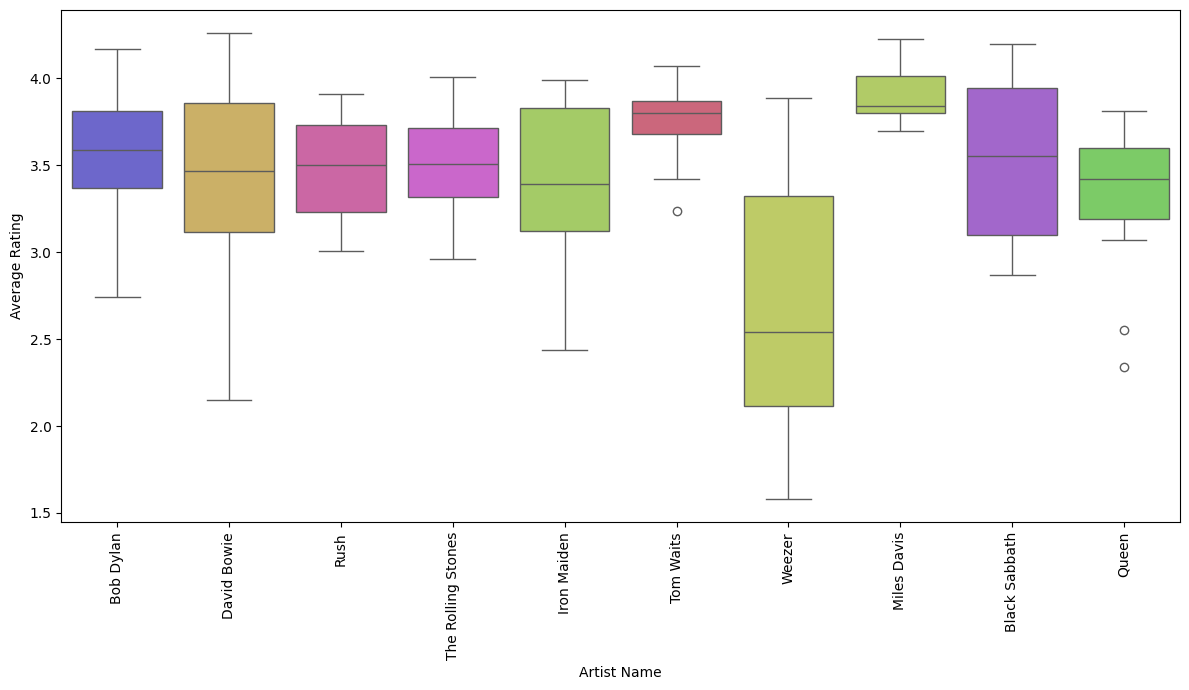

In [16]:
#plotting 

plt.figure(figsize=(12,7))
sns.boxplot(data = df_mp, x = df_mp['artist_name'], y = df_mp['avg_rating'], hue=df_mp['artist_name'], palette=artist_palette)
plt.xticks(rotation=90);
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/most_entries_box')

C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:10: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  plt.tight_layout()
C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:10: UserWarning: Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from current font.
  plt.tight_layout()
C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:10: UserWarning: Glyph 26179 (\N{CJK UNIFIED IDEOGRAPH-6643}) missing from current font.
  plt.tight_layout()
C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:11: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  plt.savefig('plots/highest_avg_box')
C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:11: UserWarning: Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from current font.
  plt.savefig('plots/highest_avg_box')
C:\Users\andy4\AppData\Local\Temp\ipykernel_51312\3478295495.py:11: UserWarning: Glyph 26179 (

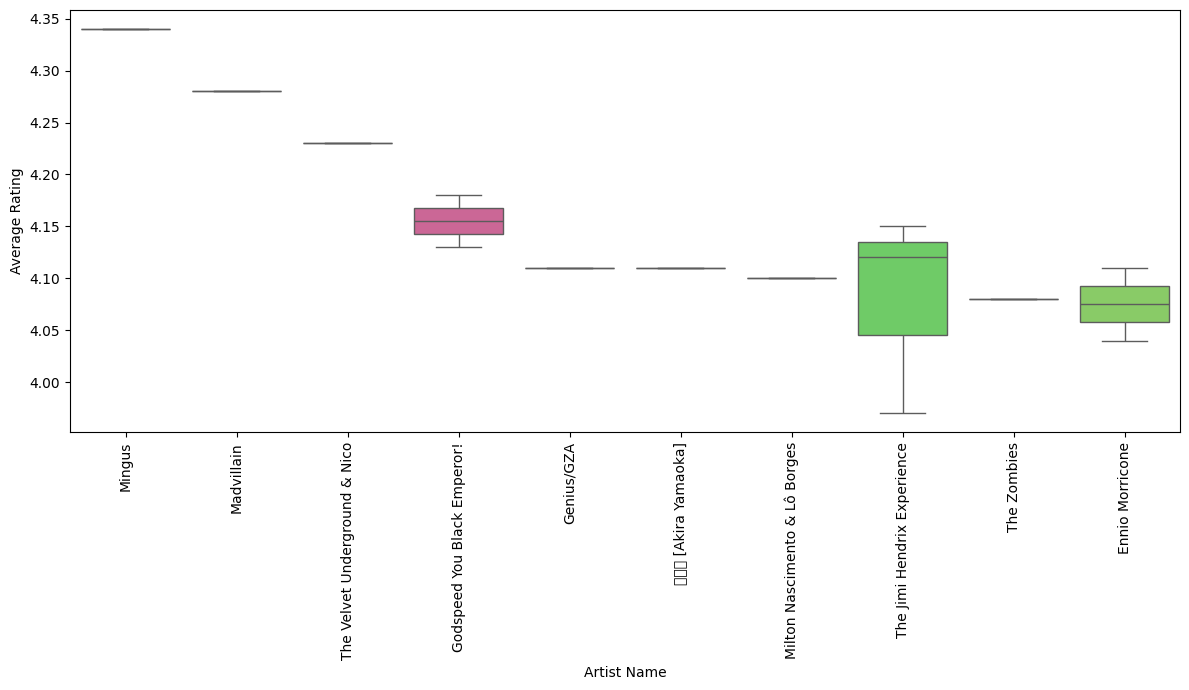

In [17]:
#plotting 
plt.figure(figsize=(12,7))
ax = sns.boxplot(data = df_hr, x = df_hr['artist_name'], y = df_hr['avg_rating'], hue=df_hr['artist_name'],palette=artist_palette)
font_path = 'path/to/SimHei.ttf'  # Update this path to the correct font path
# font_prop = fm.FontProperties(fname=fm.findfont('DejaVu Sans'))
# plt.setp(ax.get_xticklabels(), fontproperties=font_prop)
plt.xticks(rotation=90);
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/highest_avg_box')

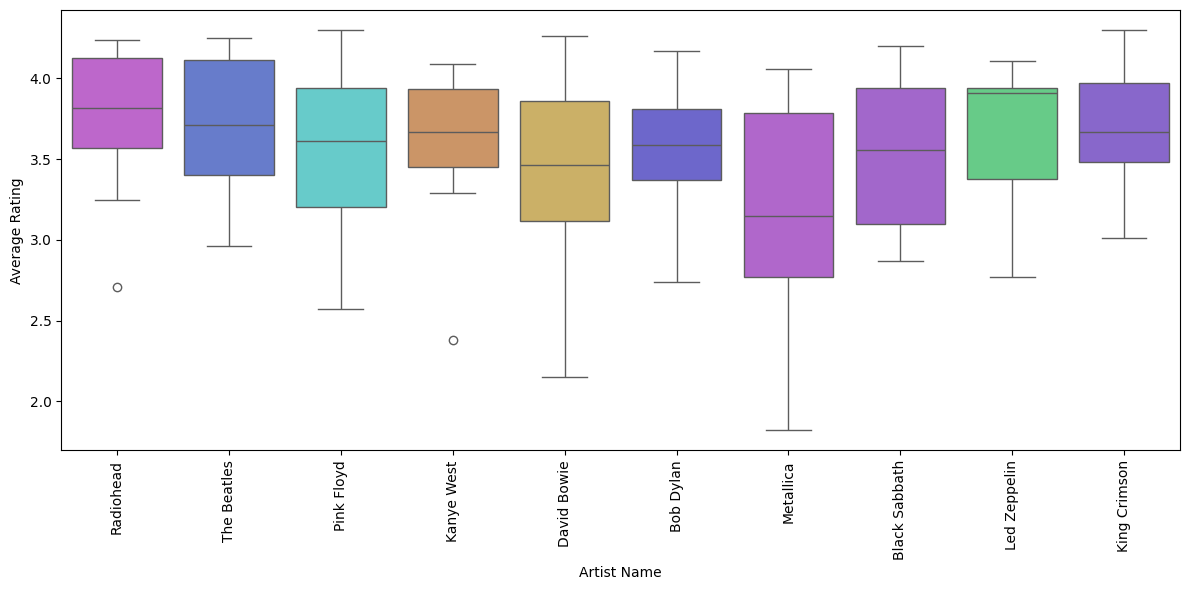

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_mra, x = df_mra['artist_name'], y = df_mra['avg_rating'], hue=df_mra['artist_name'],palette=artist_palette)
plt.xticks(rotation=90);
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/most_ratings_box')

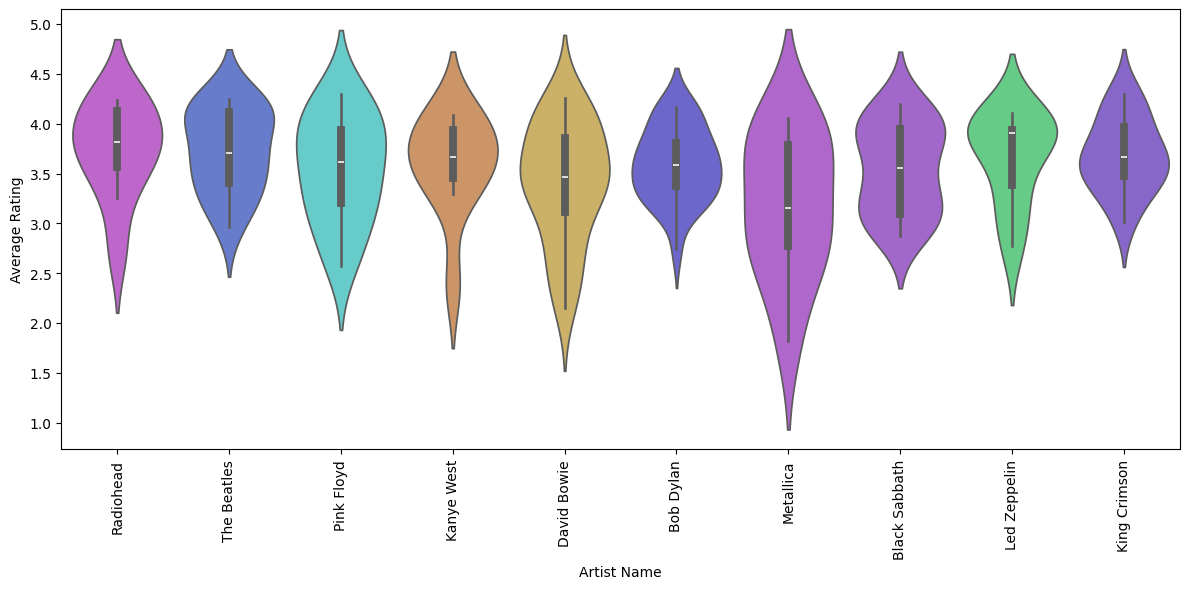

In [19]:
plt.figure(figsize=(12,6))
sns.violinplot(data = df_mra, x = df_mra['artist_name'], y = df_mra['avg_rating'], hue=df_mra['artist_name'],palette=artist_palette)
plt.xticks(rotation=90);
plt.tight_layout()
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.savefig('plots/most_ratings_violin')

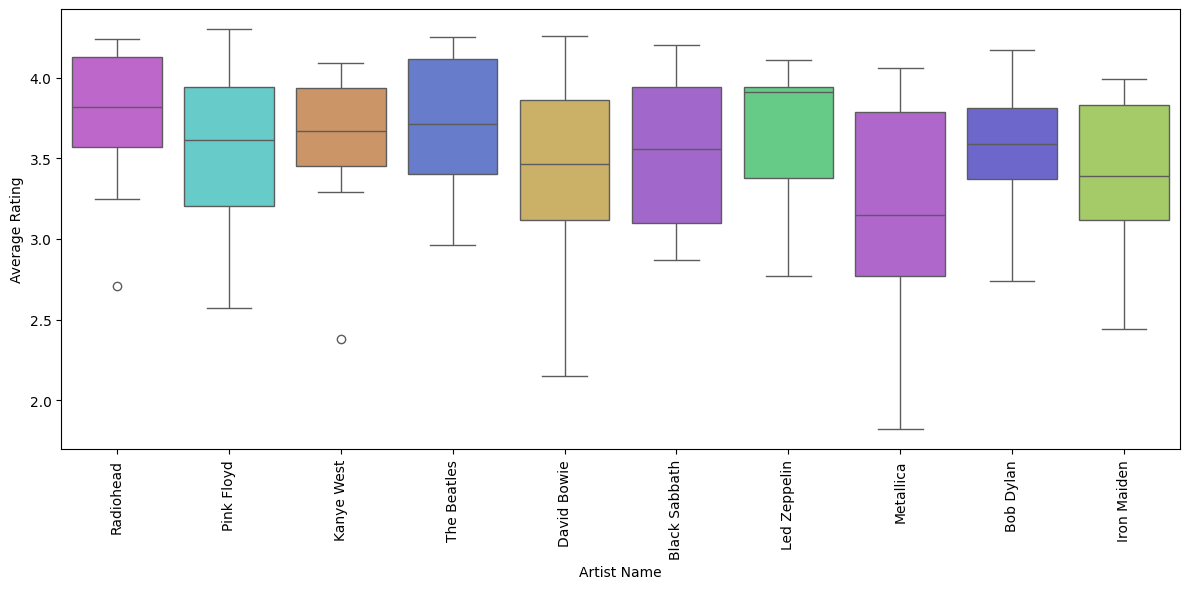

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_mre, x = df_mre['artist_name'], y = df_mre['avg_rating'], hue=df_mre['artist_name'],palette=artist_palette)
plt.xticks(rotation=90);
plt.tight_layout()
plt.xlabel('Artist Name')
plt.ylabel('Average Rating')
plt.savefig('plots/most_reviews_box')

### iii) Primary Genres

In [21]:
df_pexp = df.explode('p_g')
groupd = df_pexp.groupby('p_g').agg({'avg_rating':['count','mean'],'rating_count':'sum','review_count':'sum'})

In [22]:
mp_genres = groupd[('avg_rating','count')].sort_values(ascending=False)[:10]
mp_genres = mp_genres.reset_index()
mp_genres.columns = ['genre', 'count']

mra_genres = groupd[('rating_count','sum')].sort_values(ascending=False)[:10]
mra_genres = mra_genres.reset_index()
mra_genres.columns = ['genre','count']

mre_genres = groupd[('review_count','sum')].sort_values(ascending=False)[:10]
mre_genres = mre_genres.reset_index()
mre_genres.columns = ['genre','count']

hr_genres = groupd[('avg_rating','mean')].sort_values(ascending=False)[:10]
hr_genres = hr_genres.reset_index()
hr_genres.columns = ['genre','mean rating']      

In [23]:
genres = list(set(list(mp_genres.genre.tolist() + mra_genres.genre.tolist() + mre_genres.genre.tolist() + hr_genres.genre.tolist())))
p_g_palette = sns.color_palette('hls', len(genres))
p_g_palette = {genre: colour for genre, colour in zip(genres,p_g_palette)}

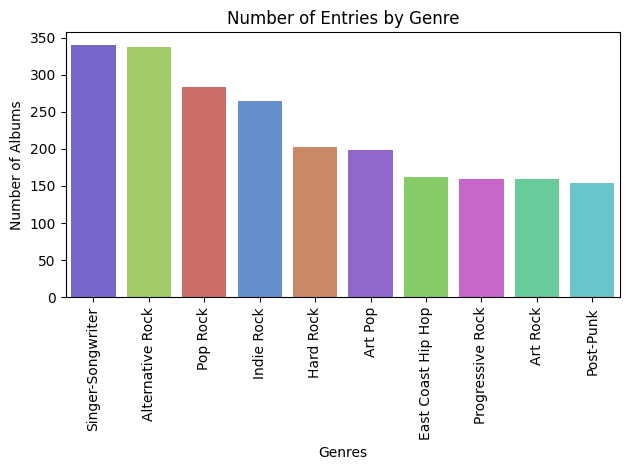

In [24]:
sns.barplot(data = mp_genres, x='genre',y='count', hue = 'genre', legend=False, palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Entries by Genre')
plt.ylabel('Number of Albums')
plt.tight_layout()
plt.savefig('plots/genre/pg_counts')

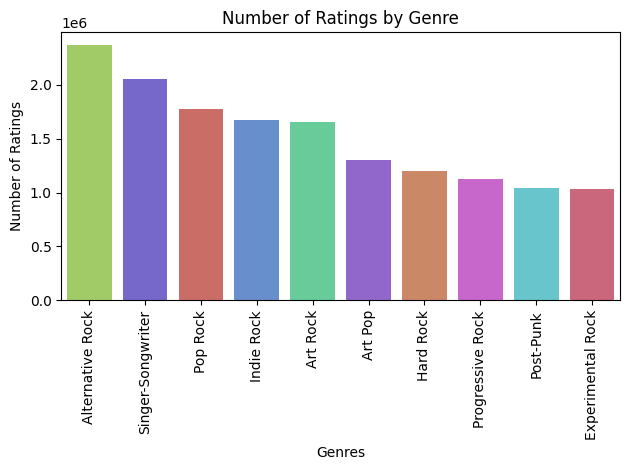

In [25]:
sns.barplot(mra_genres, x = 'genre', y='count',hue='genre',palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Ratings by Genre')
plt.ylabel('Number of Ratings')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/pg_ra')

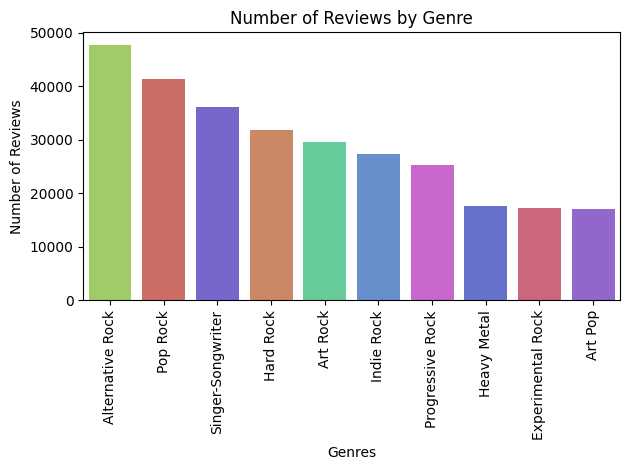

In [26]:
sns.barplot(mre_genres,x='genre',y='count', hue = 'genre',palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Reviews by Genre')
plt.ylabel('Number of Reviews')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/pg_re')

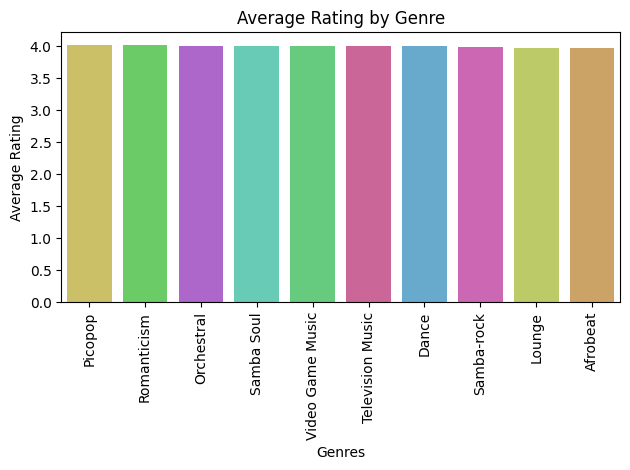

In [27]:
sns.barplot(hr_genres,x='genre',y='mean rating', hue = 'genre', palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/genre/pg_avgr')

### iv) Secondary Genres

In [28]:
df_sexp = df.explode('s_g')
groupd = df_sexp.groupby('s_g').agg({'avg_rating':['count','mean'],'rating_count':'sum','review_count':'sum'})
groupd.drop('', axis=0, inplace=True)

In [29]:
mp_genres = groupd[('avg_rating','count')].sort_values(ascending=False)[:10]
mp_genres = mp_genres.reset_index()
mp_genres.columns = ['genre', 'count']

mra_genres = groupd[('rating_count','sum')].sort_values(ascending=False)[:10]
mra_genres = mra_genres.reset_index()
mra_genres.columns = ['genre','count']

mre_genres = groupd[('review_count','sum')].sort_values(ascending=False)[:10]
mre_genres = mre_genres.reset_index()
mre_genres.columns = ['genre','count']

hr_genres = groupd[('avg_rating','mean')].sort_values(ascending=False)[:10]
hr_genres = hr_genres.reset_index()
hr_genres.columns = ['genre','mean rating']      

In [30]:
genres = list(set(list(mp_genres.genre.tolist() + mra_genres.genre.tolist() + mre_genres.genre.tolist() + hr_genres.genre.tolist())))
p_g_palette = sns.color_palette('hls', len(genres))
p_g_palette = {genre: colour for genre, colour in zip(genres,p_g_palette)}

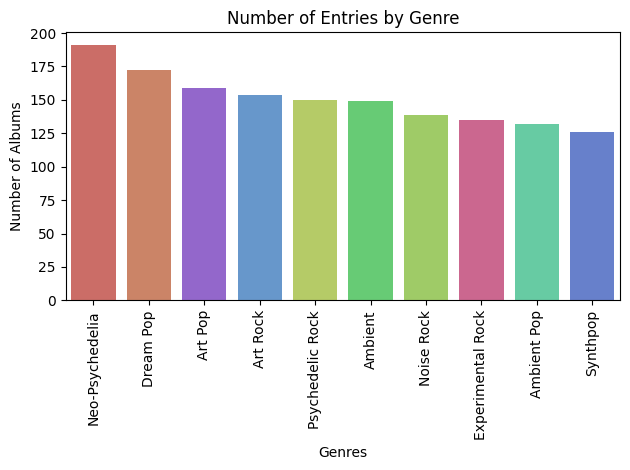

In [31]:
sns.barplot(data = mp_genres, x='genre',y='count', hue = 'genre', legend=False, palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Entries by Genre')
plt.ylabel('Number of Albums')
plt.tight_layout()
plt.savefig('plots/genre/sg_counts')

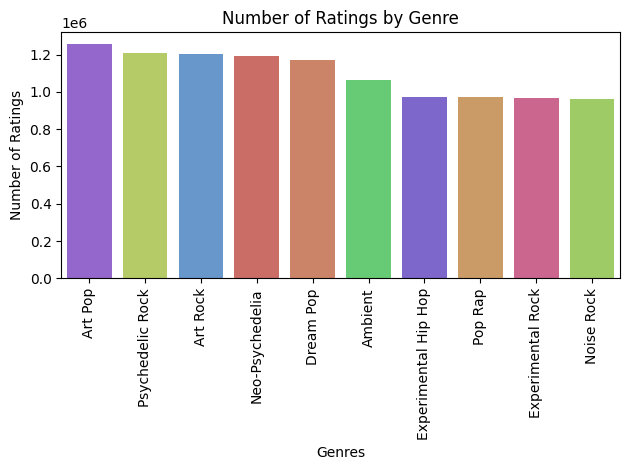

In [32]:
sns.barplot(mra_genres, x = 'genre', y='count',hue='genre',palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Ratings by Genre')
plt.ylabel('Number of Ratings')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/sg_ra')

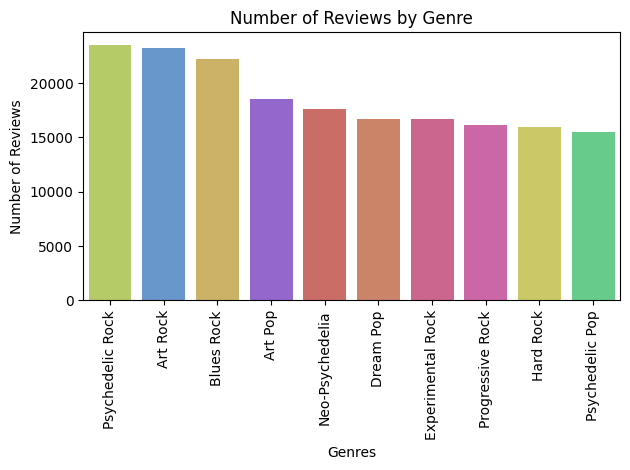

In [33]:
sns.barplot(mre_genres,x='genre',y='count', hue = 'genre',palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Reviews by Genre')
plt.ylabel('Number of Reviews')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/sg_re')

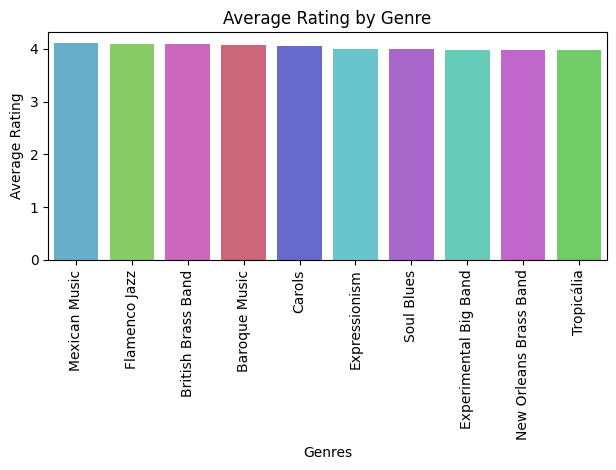

In [34]:
sns.barplot(hr_genres,x='genre',y='mean rating', hue = 'genre', palette = p_g_palette)
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/genre/sg_avgr')

### v) Descriptors

In [35]:
df_dexp = df.explode('desc_list')
groupd = df_dexp.groupby('desc_list').agg({'avg_rating':['count','mean'],'rating_count':'sum','review_count':'sum'})
# groupd.drop('', axis=0, inplace=True)

In [36]:
mp_descs = groupd[('avg_rating','count')].sort_values(ascending=False)[:10]
mp_descs = mp_descs.reset_index()
mp_descs.columns = ['desc', 'count']

mra_descs = groupd[('rating_count','sum')].sort_values(ascending=False)[:10]
mra_descs = mra_descs.reset_index()
mra_descs.columns = ['desc','count']

mre_descs = groupd[('review_count','sum')].sort_values(ascending=False)[:10]
mre_descs = mre_descs.reset_index()
mre_descs.columns = ['desc','count']

hr_descs = groupd[('avg_rating','mean')].sort_values(ascending=False)[:10]
hr_descs = hr_descs.reset_index()
hr_descs.columns = ['desc','mean rating']      

In [37]:
descs = list(set(list(mp_descs.desc.tolist() + mra_descs.desc.tolist() + mre_descs.desc.tolist() + hr_descs.desc.tolist())))
d_palette = sns.color_palette('hls', len(descs))
d_palette = {desc: colour for desc, colour in zip(descs,d_palette)}

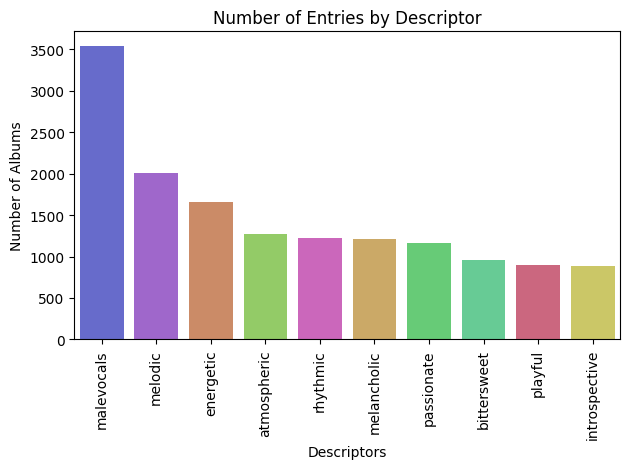

In [38]:
sns.barplot(data = mp_descs, x='desc',y='count', hue = 'desc', legend=False, palette = d_palette)
plt.xticks(rotation=90);
plt.xlabel('Descriptors')
plt.title('Number of Entries by Descriptor')
plt.ylabel('Number of Albums')
plt.tight_layout()
plt.savefig('plots/genre/d_counts')

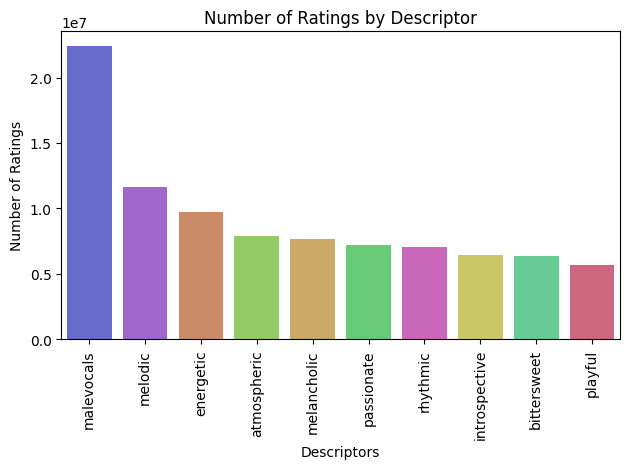

In [39]:
sns.barplot(mra_descs, x = 'desc', y='count',hue='desc',palette = d_palette)
plt.xticks(rotation=90);
plt.xlabel('Descriptors')
plt.title('Number of Ratings by Descriptor')
plt.ylabel('Number of Ratings')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/d_ra')

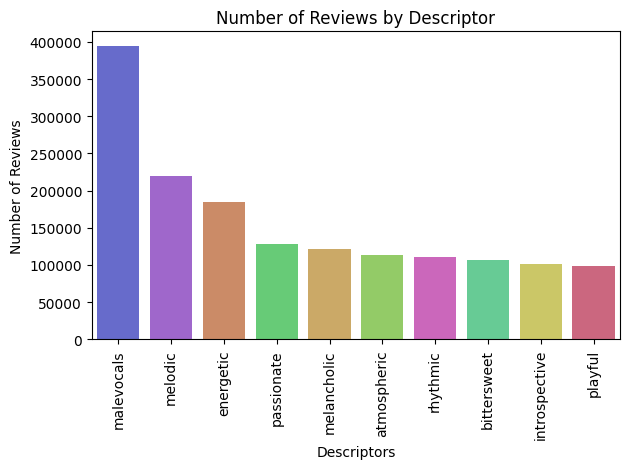

In [40]:
sns.barplot(mre_descs,x='desc',y='count', hue = 'desc',palette = d_palette)
plt.xticks(rotation=90);
plt.xlabel('Descriptors')
plt.title('Number of Reviews by Descriptor')
plt.ylabel('Number of Reviews')
# plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/d_re')

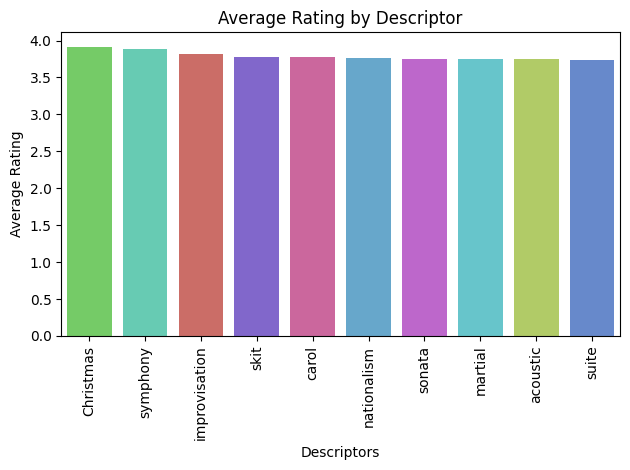

In [41]:
sns.barplot(hr_descs,x='desc',y='mean rating', hue = 'desc', palette = d_palette)
plt.xticks(rotation=90);
plt.xlabel('Descriptors')
plt.title('Average Rating by Descriptor')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/genre/d_avgr')

### vi) Years

##### Year Edit, try to write as a time series instead

- Years with most entries in the dataset
- Years with most ratings across their albums
- Years with most reviews across their albums
- Years with the highest average average rating across their albums

In [42]:
year_groupd = df.groupby('year')[['avg_rating', 'rating_count','review_count']].aggregate({'avg_rating':['count','mean'], \
                                                                                           'rating_count':'sum',\
                                                                                           'review_count':'sum'})
year_groupd.head(3)
year_groupd.reset_index(inplace=True)
year_groupd.head(3)

year avg_rating        rating_count review_count
             count   mean          sum          sum
0  1954          2  3.835         6180           69
1  1955          1  3.640         5666          148
2  1956          5  3.752        17681          344

In [43]:
cols = [col for col in year_groupd.columns if col != (        'year',      '')]

for col in cols:
    tab = year_groupd.sort_values(col,ascending=False).head(5)
    tab = pd.concat([tab['year'],tab[col]],axis=1)
    tab.reset_index(inplace=True,drop=True)
    new_i = tab.index.map(lambda x: x+1)
    tab.set_index(new_i,inplace=True)

    if col == ('avg_rating','count'):
        col = ('No. albums','count')
    else: None
    
    new_coln = (str(col).split(', ')[0].strip('(').strip("'").replace('_',' ').capitalize())
    tab.rename({col:new_coln,'year':'Year' },axis=1,inplace=True)
    
    tab_md = tab.to_markdown()
    path = f'tables/{new_coln}.txt'
    with open(path,'w') as f:
        f.write(tab_md)

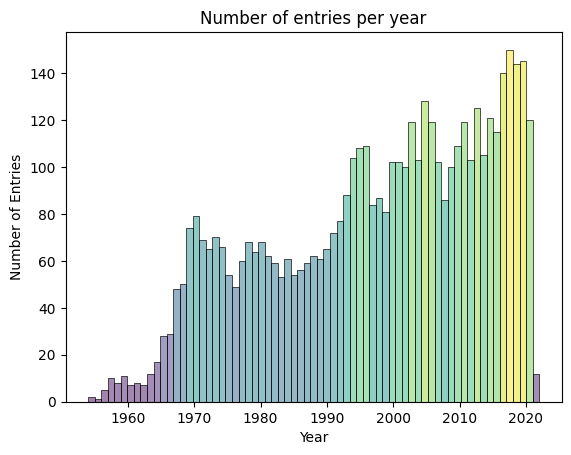

In [44]:
sns.histplot(year_groupd, x= 'year', weights = ('avg_rating','count'), bins = len(year_groupd), palette='viridis', hue = ('avg_rating','count'), legend=False)
plt.ylabel('Number of Entries')
plt.xlabel('Year');
plt.title('Number of entries per year')
plt.savefig('plots/entries_per_year')

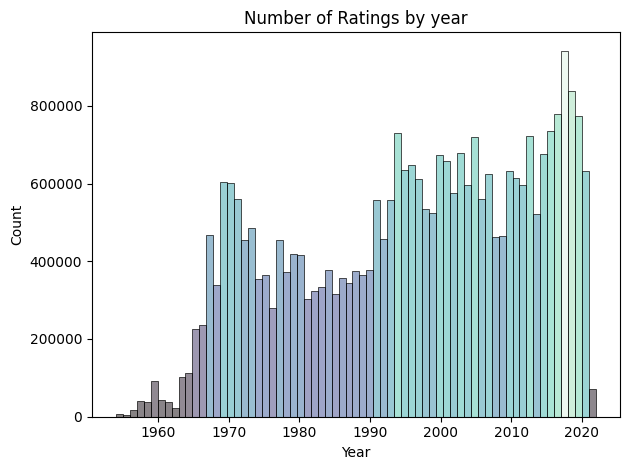

In [45]:
sns.histplot(data=year_groupd, x='year', bins=len(year_groupd['year']), hue =('rating_count','sum'), palette='mako',
             weights=year_groupd[('rating_count', 'sum')], legend=False)
plt.xlabel('Year')
plt.title('Number of Ratings by year')
plt.tight_layout()
plt.savefig('plots/ratings_per_year')

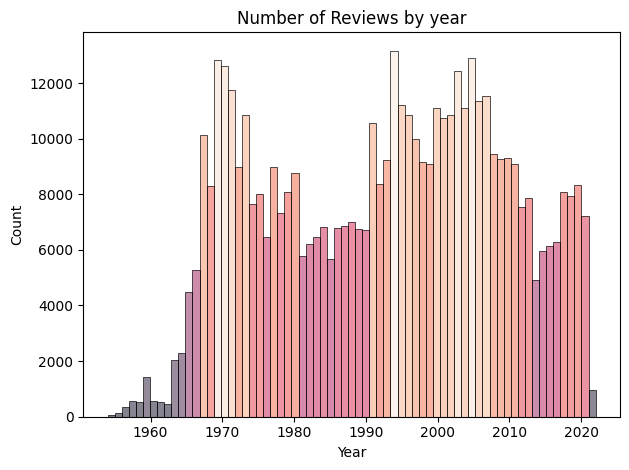

In [46]:
sns.histplot(data=year_groupd, x='year', bins=len(year_groupd['year']), hue =('review_count','sum'), palette='rocket',
             weights=year_groupd[('review_count', 'sum')], legend=False)
plt.xlabel('Year')
plt.title('Number of Reviews by year')
plt.tight_layout()
plt.savefig('plots/reviews_per_year')

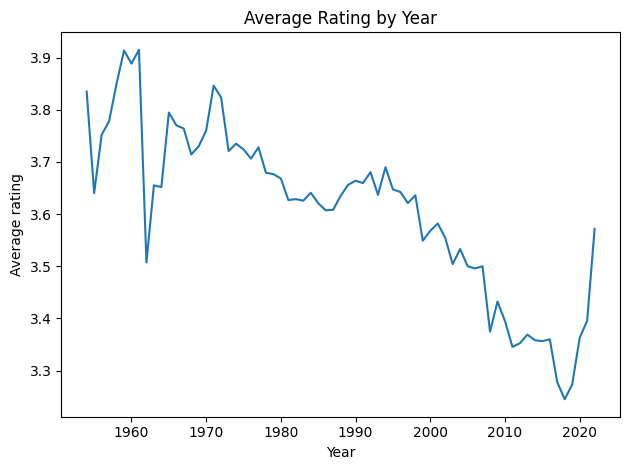

In [47]:
sns.lineplot(data=year_groupd, x='year',y=('avg_rating','mean'))
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average Rating by Year')
plt.tight_layout()
plt.savefig('plots/rating_by_year')